In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
missing_marks = pd.read_csv('missingmarks_clean_data.csv')

In [38]:
missing_marks.head()

,institution,system,data_loss_gen,data_loss_human,data_loss_machine,data_loss_hybrid,system_error_chance,feature
0,10602,1,2,3,4,1,1,2
1,10612,1,2,3,3,1,1,2
2,10597,1,2,1,1,2,1,1
3,10597,2,2,2,4,2,1,2
4,10597,1,1,1,2,1,1,1


In [39]:
missing_marks.shape

(10047, 8)

In [40]:
missing_marks.dtypes

institution            int64
system                 int64
data_loss_gen          int64
data_loss_human        int64
data_loss_machine      int64
data_loss_hybrid       int64
system_error_chance    int64
feature                int64
dtype: object

In [41]:
x = missing_marks.drop(columns=['institution', 'system', 'feature'])
y = missing_marks['feature']

In [42]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=30)

In [44]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('x_test.shape: ', x_test.shape)


x_train.shape:  (6027, 5)
y_train.shape:  (6027,)
x_val.shape:  (2010, 5)
y_val.shape:  (2010,)
x_test.shape:  (2010, 5)
x_test.shape:  (2010, 5)


In [45]:
rfc_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [46]:
rfc_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
rfc_model.score(x_train, y_train)

0.9726231956197113

In [48]:
rfc_model.score(x_val, y_val)

0.9741293532338309

In [49]:
rfc_proba = rfc_model.predict_proba(x_train)
rfc_proba

array([[0.95721773, 0.04278227],
       [0.95721773, 0.04278227],
       [0.95721773, 0.04278227],
       ...,
       [1.        , 0.        ],
       [0.95810768, 0.04189232],
       [1.        , 0.        ]])

In [50]:
rfc_model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

plt.figure(figsize=(80, 20))
plot_tree(rfc_model.estimators_[0], 
          max_depth=2, 
          feature_names=x_train.columns, 
          filled=True, 
          rounded=True, 
          class_names = rfc_model.classes_
          )

In [51]:
len(rfc_model.estimators_)

100

In [52]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : rfc_model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
3,data_loss_hybrid,0.393229
2,data_loss_machine,0.234244
1,data_loss_human,0.178285
0,data_loss_gen,0.151091
4,system_error_chance,0.043151


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

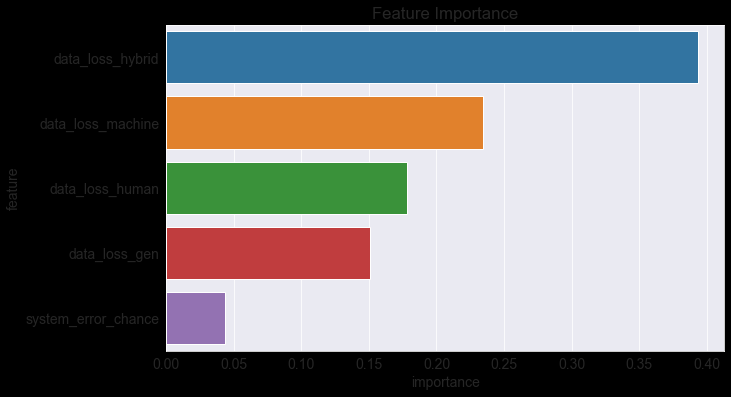

In [53]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature')

In [54]:
def error_rate(est):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'No. of Estimators' : est, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [55]:
rfc_error_df = pd.DataFrame([error_rate(est) for est in range (1, 30)])

In [56]:
rfc_error_df

,No. of Estimators,Training Error,Validation Error
0,1,0.027543,0.025871
1,2,0.027377,0.025871
2,3,0.027377,0.025871
3,4,0.027377,0.025871
4,5,0.027377,0.025871
5,6,0.027377,0.025871
6,7,0.027377,0.025871
7,8,0.027377,0.025871
8,9,0.027377,0.025871
9,10,0.027377,0.025871


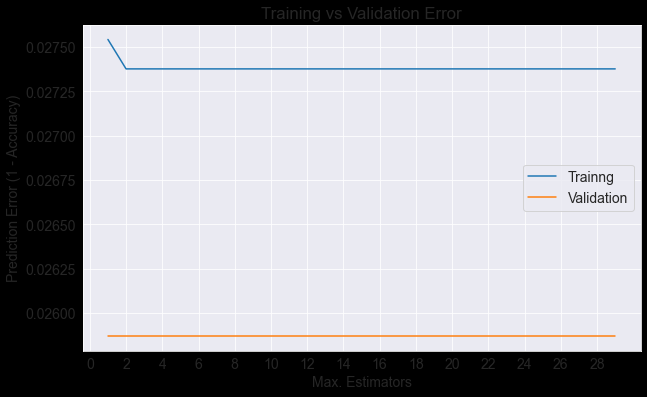

In [76]:
plt.figure()
plt.plot(rfc_error_df['No. of Estimators'], rfc_error_df['Training Error'])
plt.plot(rfc_error_df['No. of Estimators'], rfc_error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,30,2))
plt.xlabel('Max. Estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [58]:
def md_error_rate(dm):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=dm)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Depth' : dm, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [59]:
md_df = pd.DataFrame([md_error_rate(dm) for dm in range (1, 26)])

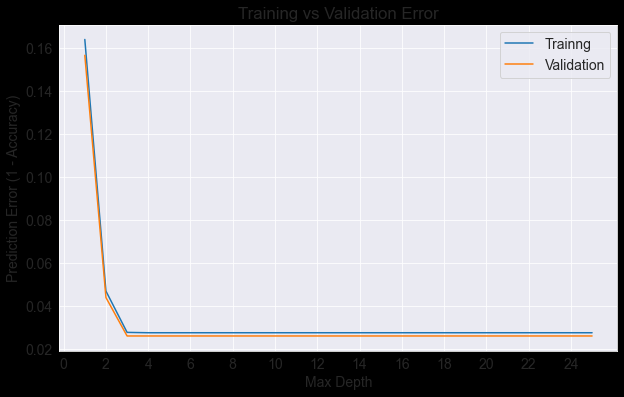

In [65]:
plt.figure()
plt.plot(md_df['Max Depth'], md_df['Training Error'])
plt.plot(md_df['Max Depth'], md_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,26,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [61]:
def mln_error_rate(mln):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=mln)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Leaf_nodes' : mln, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [62]:
mln_df = pd.DataFrame([mln_error_rate(mln) for mln in range(2, 32)])

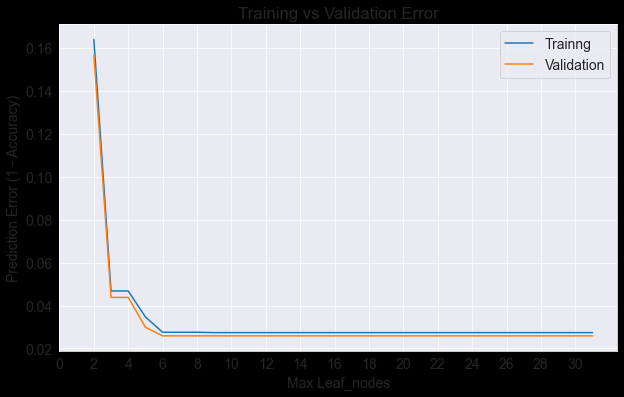

In [66]:
plt.figure()
plt.plot(mln_df['Max Leaf_nodes'], mln_df['Training Error'])
plt.plot(mln_df['Max Leaf_nodes'], mln_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,32,2))
plt.xlabel('Max Leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Trainng', 'Validation'])

In [67]:
def mf_error_rate(mf):
    rfc_model_1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=mf)
    rfc_model_1.fit(x_train, y_train)
    
    rfc_train_accuracy = 1 - rfc_model_1.score(x_train, y_train)
    rfc_val_accuracy = 1 - rfc_model_1.score(x_val, y_val)
    
    return {
        'Max Features' : mf, 
        'Training Error' : rfc_train_accuracy,
        'Validation Error' : rfc_val_accuracy
    }

In [68]:
mf_df = pd.DataFrame([mf_error_rate('log2')])
mf_df

,Max Features,Training Error,Validation Error
0,log2,0.027377,0.025871


In [69]:
mf_df = pd.DataFrame([mf_error_rate('sqrt')])
mf_df

,Max Features,Training Error,Validation Error
0,sqrt,0.027377,0.025871


In [70]:
mf_df = pd.DataFrame([mf_error_rate('auto')])
mf_df

,Max Features,Training Error,Validation Error
0,auto,0.027377,0.025871


In [71]:
def arg_parameters(**params):
    rf_test = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    
    return rf_test.score(x_train, y_train), rf_test.score(x_val, y_val)

In [72]:
arg_parameters(min_impurity_decrease=1e-7)

(0.9726231956197113, 0.9741293532338309)

In [73]:
arg_parameters(min_impurity_decrease=1e-5)


(0.9726231956197113, 0.9741293532338309)

In [74]:
arg_parameters(bootstrap=False)


(0.9726231956197113, 0.9741293532338309)

In [75]:
arg_parameters(bootstrap=True, max_samples=0.9)


(0.9726231956197113, 0.9741293532338309)

In [82]:
rf_tuned = RandomForestClassifier(
    random_state=42,
    n_estimators=4,
    max_features='sqrt',
    max_leaf_nodes=4,
    max_depth=4,
    min_impurity_decrease=1e-5,
    bootstrap=True,
    max_samples=0.9,
)

In [83]:
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=4,
                       max_samples=0.9, min_impurity_decrease=1e-05,
                       n_estimators=4, random_state=42)

In [85]:
rf_tuned.score(x_train, y_train), rf_tuned.score(x_val, y_val)

(0.9653227144516343, 0.9701492537313433)

In [87]:
rf_tuned.score(x_test, y_test)

0.9686567164179104

In [88]:
predictions_1 = rf_tuned.predict(x_test)

In [90]:
probability = rf_tuned.predict_proba(x_train)
probability

array([[0.95701408, 0.04298592],
       [0.95701408, 0.04298592],
       [0.95701408, 0.04298592],
       ...,
       [0.97966998, 0.02033002],
       [0.94933739, 0.05066261],
       [0.96278195, 0.03721805]])

In [96]:
probability = rf_tuned.predict_proba(x_test)
probability

array([[9.37781955e-01, 6.22180451e-02],
       [9.52064903e-01, 4.79350974e-02],
       [9.52064903e-01, 4.79350974e-02],
       ...,
       [9.52064903e-01, 4.79350974e-02],
       [7.60650261e-04, 9.99239350e-01],
       [9.57014080e-01, 4.29859196e-02]])

In [91]:


accuracy = accuracy_score(y_test, predictions_1)
print('Accuracy = {:.3f}%' .format(accuracy*100))

Accuracy = 96.866%


In [92]:
confusion = confusion_matrix(y_test, predictions_1)
score = confusion.diagonal() / confusion.sum(axis =1) *100
print('Marks likley to be missing: {:.2f}%' .format(score[0]))
print('Marks not likely to be missing:  {:.2f}%' .format(score[1]))

Marks likley to be missing: 99.94%
Marks not likely to be missing:  80.69%


<AxesSubplot:>

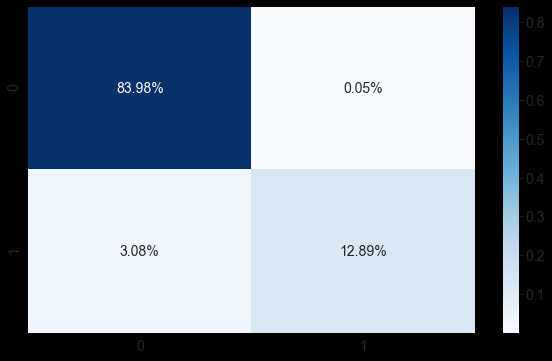

In [97]:
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

In [95]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98      1689
           2       1.00      0.81      0.89       321

    accuracy                           0.97      2010
   macro avg       0.98      0.90      0.94      2010
weighted avg       0.97      0.97      0.97      2010

